In [1]:
import pickle
import cv2
import pandas as pd
import numpy as np

In [2]:
with open('denseOutput.pkl', 'rb') as f:
    rawList = pickle.load(f)

df = pd.DataFrame(rawList, columns=['mag', 'ang'])

In [3]:
df['mean'] = df['mag'].apply(lambda x: np.mean(x))
df['std'] = df['mag'].apply(lambda x: np.std(x))

meanList = df['mean'].tolist()
stdList = df['std'].tolist()

mean_per_second = np.add.reduceat(meanList, np.arange(0, len(meanList), 30))
std_per_second = np.add.reduceat(stdList, np.arange(0, len(stdList), 30))

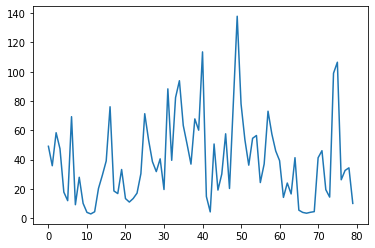

In [9]:
from matplotlib import pyplot as plt 

plt.plot(std_per_second)

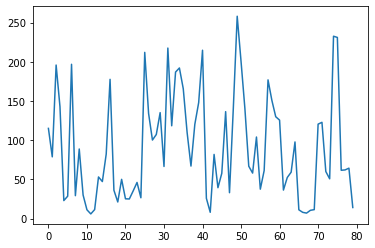

In [11]:
plt.plot(mean_per_second)

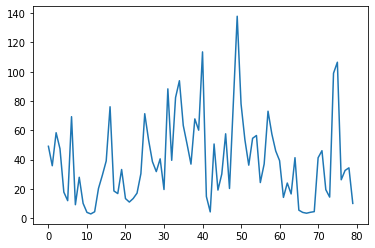

In [10]:
plt.plot(pd.DataFrame(std_per_second).fillna(method="ffill"))